<center>
    

## **Worldwide Economic Trends: Insights and Opportunities**

</center>

## Dataset Name: *World Bank Data*

## Source: [Kaggle.com](https://www.kaggle.com/datasets/yusufglcan/country-data/data)

## Description
The World Bank is an international financial institution that provides financial and technical assistance to developing countries for development programs, with the goal of reducing poverty and supporting sustainable development. The World Bank collects and publishes a vast array of data related to global development through its World Development Indicators (WDI) and other reports.



| Dataset: World Bank Data on Countries    |
|-------------------------------------------|
| Records: 5105                             |
| Features: 25                              |
| Dataset Size: 1.62 MB                     |


## Step 1: Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Loading the Dataset

In [2]:
# Load the dataset
data = pd.read_csv("Countries.csv")  

## Step 3: Exploring the Dataset

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
  Country Name Country Code  Year  Agriculture (% GDP)  \
0  Afghanistan          AFG  2000            27.501127   
1  Afghanistan          AFG  2001            27.501127   
2  Afghanistan          AFG  2002            38.627892   
3  Afghanistan          AFG  2003            37.418855   
4  Afghanistan          AFG  2004            29.721067   

   Ease of Doing Business  Education Expenditure (% GDP)  Export (% GDP)  \
0               40.717968                      13.670101             NaN   
1               40.717968                      13.670101             NaN   
2               40.717968                      13.670101             NaN   
3               40.717968                      13.670101             NaN   
4               40.717968                      13.670101             NaN   

            GDP  Health Expenditure (% GDP)  Import (% GDP)  ...  Population  \
0  1.415197e+10                   10.902580             NaN  ...  19542982.0   
1  1.

In [4]:
# Get an overview of the dataset
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   5106 non-null   object 
 1   Country Code                   5106 non-null   object 
 2   Year                           5106 non-null   int64  
 3   Agriculture (% GDP)            4830 non-null   float64
 4   Ease of Doing Business         4508 non-null   float64
 5   Education Expenditure (% GDP)  4738 non-null   float64
 6   Export (% GDP)                 4646 non-null   float64
 7   GDP                            5037 non-null   float64
 8   Health Expenditure (% GDP)     4531 non-null   float64
 9   Import (% GDP)                 4646 non-null   float64
 10  Industry (% GDP)               4853 non-null   float64
 11  Inflation Rate                 4554 non-null   float64
 12  R&D                       

In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Country Name                        0
Country Code                        0
Year                                0
Agriculture (% GDP)               276
Ease of Doing Business            598
Education Expenditure (% GDP)     368
Export (% GDP)                    460
GDP                                69
Health Expenditure (% GDP)        575
Import (% GDP)                    460
Industry (% GDP)                  253
Inflation Rate                    552
R&D                              1518
Service (% GDP)                   299
Unemployment                      667
Population                          0
Land                                0
Continent Name                      0
Export                            460
Import                            460
Education Expenditure             414
Health Expenditure                575
Net Trade                         460
GDP Per Capita                     69
Population Density                  0
dtype: int64


## Step 4: Data Cleaning and Preprocessing

In [6]:
# Handle missing values

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Filter data for the year 2022
data_2022 = data[data['Year'] == 2022]

## Step 5: Data Analysis and Visualization

### 1. Scatter Plot of GDP per Capita vs. Education Expenditure (% GDP)

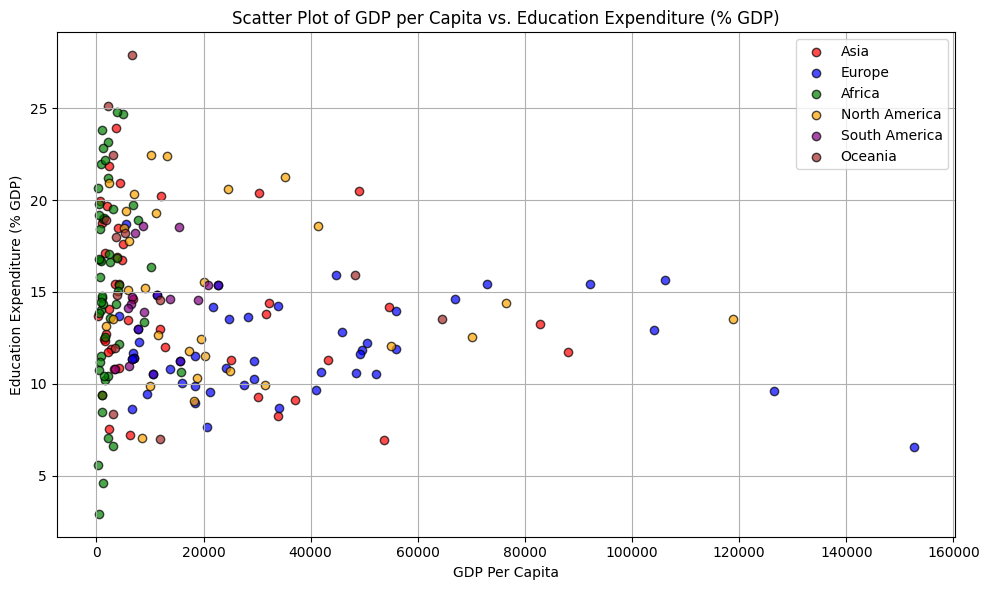

In [7]:
# Define colors for each continent
continent_colors = {'Asia': 'red', 'Europe': 'blue', 'Africa': 'green', 'North America': 'orange', 'South America': 'purple', 'Oceania': 'brown'}

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the scatter plot with continent-based coloring
for continent, color in continent_colors.items():
    subset = data_2022[data_2022['Continent Name'] == continent]
    plt.scatter(subset['GDP Per Capita'], subset['Education Expenditure (% GDP)'],
                alpha=0.7, color=color, label=continent, edgecolor='black')

# Add labels and title
plt.xlabel('GDP Per Capita')
plt.ylabel('Education Expenditure (% GDP)')
plt.title('Scatter Plot of GDP per Capita vs. Education Expenditure (% GDP)')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Line chart of GDP Growth and population Across Continents (2000-2022)

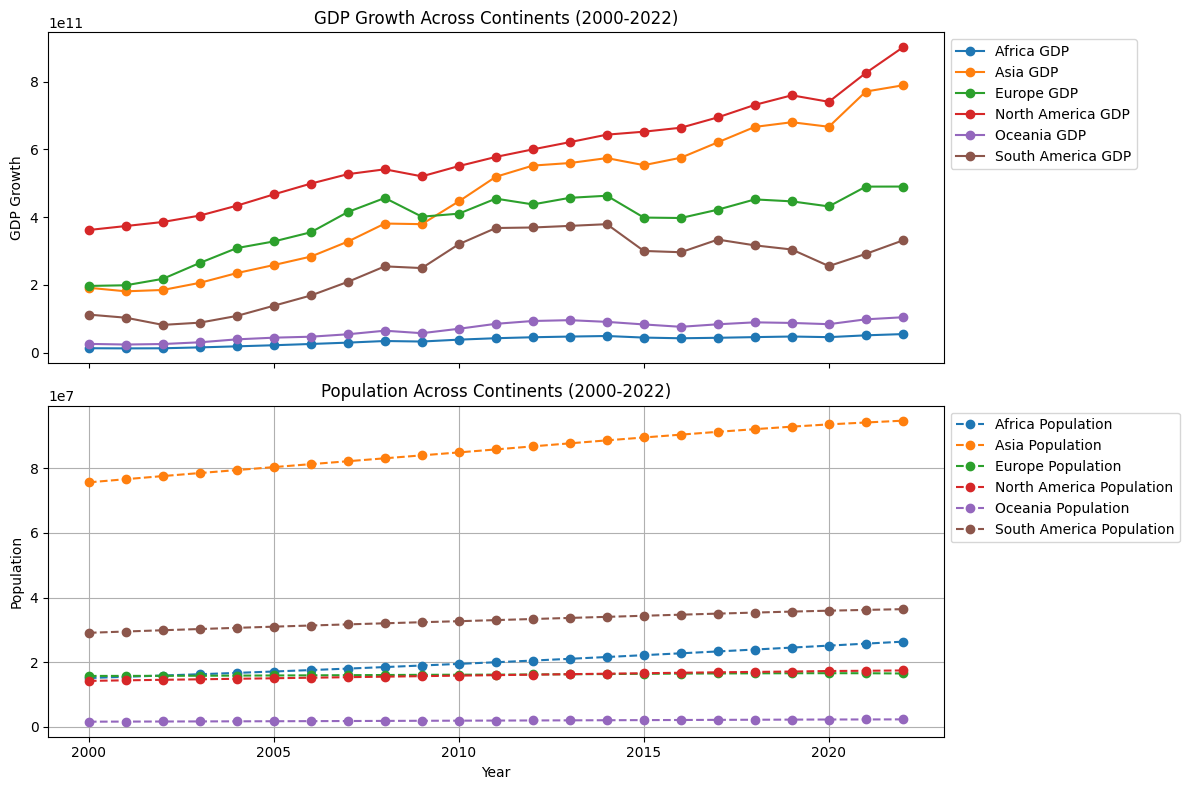

In [8]:
# Filter data for the years 2000-2022
data_years = data[(data['Year'] >= 2000) & (data['Year'] <= 2022)]

# Group data by year and continent, and calculate the mean GDP growth and population for each group
grouped_data = data_years.groupby(['Year', 'Continent Name']).agg({'GDP': 'mean', 'Population': 'mean'}).reset_index()

# Get unique continents
continents = grouped_data['Continent Name'].unique()

# Set the figure size and create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the line chart for GDP growth
for continent in continents:
    subset = grouped_data[grouped_data['Continent Name'] == continent]
    axs[0].plot(subset['Year'], subset['GDP'], label=continent + ' GDP', marker='o')

# Set labels and title for the first subplot
axs[0].set_ylabel('GDP Growth')
axs[0].set_title('GDP Growth Across Continents (2000-2022)')

# Plot the line chart for population
for continent in continents:
    subset = grouped_data[grouped_data['Continent Name'] == continent]
    axs[1].plot(subset['Year'], subset['Population'], label=continent + ' Population', linestyle='--', marker='o')

# Set labels and title for the second subplot
axs[1].set_ylabel('Population')
axs[1].set_xlabel('Year')
axs[1].set_title('Population Across Continents (2000-2022)')

# Move legends outside of the graph
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Bar chart of Average Health Expenditure (% GDP) by Continent

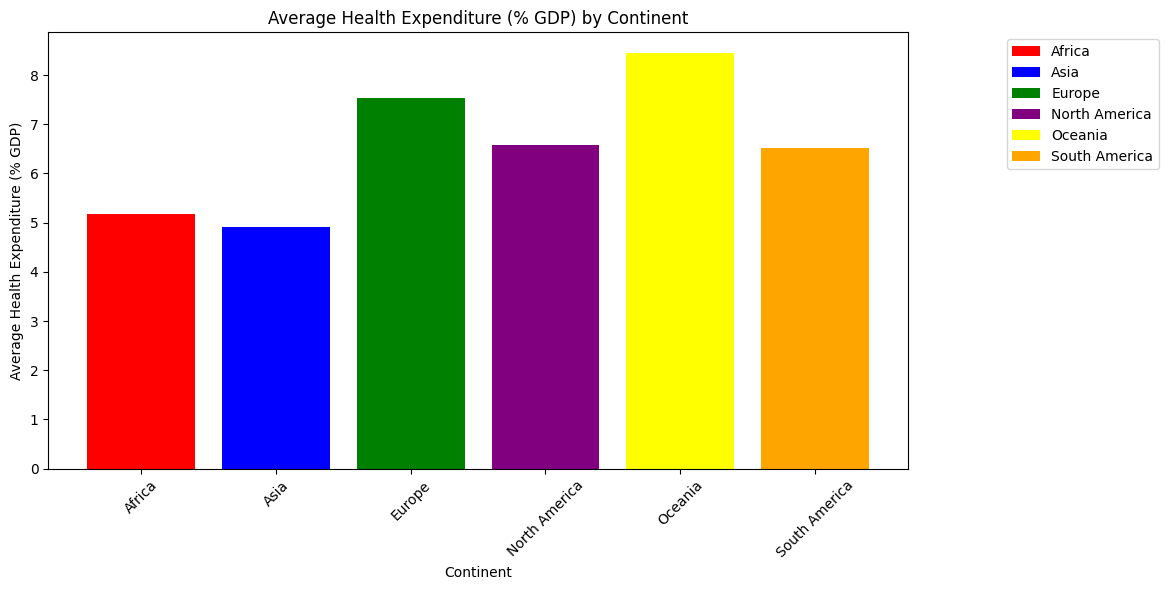

In [9]:
# Group data by continent and calculate the average health expenditure (% GDP) for each continent
average_health_expenditure = data.groupby('Continent Name')['Health Expenditure (% GDP)'].mean().reset_index()

# Define a color palette for continents
colors = {'Asia': 'blue', 'Europe': 'green', 'Africa': 'red', 'North America': 'purple', 'South America': 'orange', 'Oceania': 'yellow'}

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart with different colors for each continent
for index, row in average_health_expenditure.iterrows():
    plt.bar(row['Continent Name'], row['Health Expenditure (% GDP)'], color=colors[row['Continent Name']], label=row['Continent Name'])

# Add labels and title
plt.xlabel('Continent')
plt.ylabel('Average Health Expenditure (% GDP)')
plt.title('Average Health Expenditure (% GDP) by Continent')

# Add legend in the upper right corner
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Map visualization of GDP Per Capita by Countries

C:\Users\rakes\AppData\Local\Temp\ipykernel_22516\1665649651.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


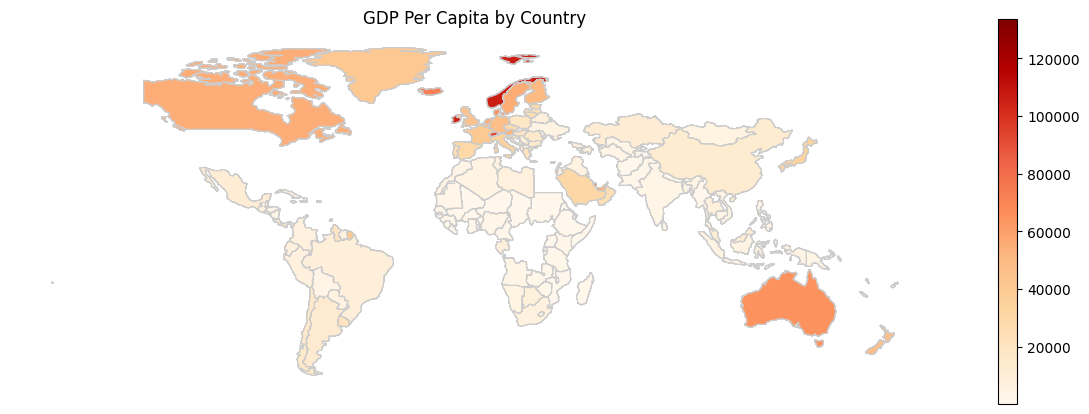

In [10]:
import geopandas as gpd


# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the datasets based on the 'name' column (country name)
world = world.merge(data, how='left', left_on='name', right_on='Country Name')

# Plot the map with decreased color scale size
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='GDP Per Capita', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.5})  # Adjust the shrink value as needed
ax.axis('off')
plt.title('GDP Per Capita by Country')
plt.show()


### 5. Dual Bar Comparison of Education and Health Expenditure by Continent in 2022

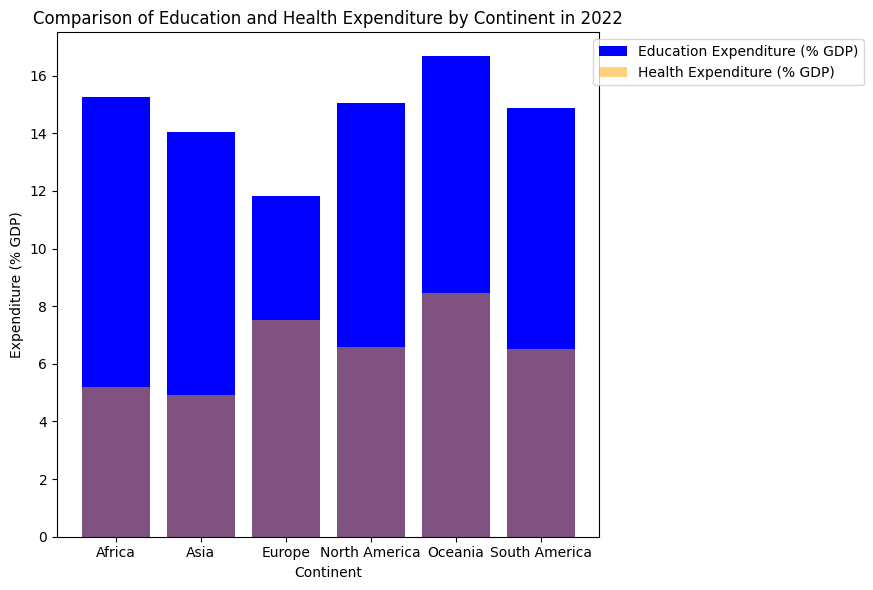

In [11]:
import matplotlib.pyplot as plt

# Filter data for the year 2022
data_2022 = data[data['Year'] == 2022]

# Group data by continent and calculate the mean Education and Health Expenditure for each continent
continent_data = data_2022.groupby('Continent Name').agg({'Education Expenditure (% GDP)': 'mean', 'Health Expenditure (% GDP)': 'mean'}).reset_index()

# Get continents
continents = continent_data['Continent Name']

# Get Education and Health Expenditure values
education_values = continent_data['Education Expenditure (% GDP)']
health_values = continent_data['Health Expenditure (% GDP)']

# Plot the dual bar chart
plt.figure(figsize=(10, 6))
plt.bar(continents, education_values, color='blue', label='Education Expenditure (% GDP)')
plt.bar(continents, health_values, color='orange', label='Health Expenditure (% GDP)', alpha=0.5)
plt.xlabel('Continent')
plt.ylabel('Expenditure (% GDP)')
plt.title('Comparison of Education and Health Expenditure by Continent in 2022')

# Move legend to the upper right corner outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.tight_layout()
plt.show()


## Step 6: Key Insights and Conclusions

### Exploring Our Findings
After diving into the data, I uncovered some fascinating insights. Let's break down what I have discovered:

### What We Performed
Conducted a thorough analysis of the dataset, exploring various economic indicators and demographic trends and visualized the data using Python and Tableau to gain a deeper understanding of global economic dynamics.

### What We Analyzed
Through analysis, identified key trends and patterns in economic growth, trade, healthcare, education, and more. Examined the relationships between different variables and their impact on overall development.

### Key Insights
analysis revealed several critical insights:
- The importance of investing in education and healthcare for sustainable development.
- The influence of global trade dynamics on economic growth and prosperity.
- The need for targeted interventions to address disparities in income, education, and healthcare access.

### Drawing Conclusions
Based on findings, I can conclude that:
- Strategic investments in human capital and infrastructure are essential for long-term economic growth.
- Policy measures should focus on promoting inclusive and sustainable development to benefit all segments of society.

### Recommendations
Moving forward, we recommend:
- Prioritizing investments in education and healthcare to build a skilled and healthy workforce.
- Enhancing trade policies to promote economic diversification and global competitiveness.
- Strengthening international cooperation to address global challenges and achieve shared prosperity.

### Conclusion
In conclusion, analysis provides valuable insights into the complex dynamics of global development. By leveraging data-driven strategies and fostering collaboration, I can work towards a more equitable and prosperous future for all.

